In [41]:
# use pandas to load 'uiuc-gpa-dataset.csv'

import pandas as pd
df = pd.read_csv('uiuc-gpa-dataset.csv')

# Keep only Subject=='CS'
df = df[df['Subject'] == 'ECE']

# Keep only Term=='Fall' or Term=='Spring'
df = df[(df['Term'] == 'Fall') | (df['Term'] == 'Spring')]

# Sum these columns 'A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F' into a 'Enrollment' column

df['Enrollment'] = df['A+'] + df['A'] + df['A-'] + df['B+'] + df['B'] + df['B-'] + df['C+'] + df['C'] + df['C-'] + df['D+'] + df['D'] + df['D-'] + df['F']

# Drop those columns

df = df.drop(columns=['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F'])

# Create a column 'Full Course' by string concating 'YearTerm' + Subject + Number, e.g. '2024-wi-ADV-150'

df['Full Course'] = df['YearTerm'] + '-' + df['Subject'] + '-' + df['Number'].astype(str)
df['Partial Course'] = df['Subject'] + ' ' + df['Number'].astype(str)
# Create a new column 'YearTermNumber' mapping Year+'Fall' to Year+0.5 and Year+'Spring' to Year
df['YearTermNumber'] = df['Year'].astype(int) + df['Term'].map({'Fall': 0.5, 'Spring': 0})

# Create a new dataframe that sums all rows 'Enrollment' values with the same 'Full Course' value, and includes 'Full Course','YearTermNumber',and 'Enrollment'ArithmeticError
df = df.groupby(['Full Course', 'YearTermNumber', 'Partial Course', 'Number'])['Enrollment'].sum().reset_index()

# Print columns
print(df.columns)
print(df.head())

Index(['Full Course', 'YearTermNumber', 'Partial Course', 'Number',
       'Enrollment'],
      dtype='object')
       Full Course  YearTermNumber Partial Course  Number  Enrollment
0  2010-fa-ECE-101          2010.5        ECE 101     101          22
1  2010-fa-ECE-110          2010.5        ECE 110     110         354
2  2010-fa-ECE-190          2010.5        ECE 190     190         231
3  2010-fa-ECE-205          2010.5        ECE 205     205         213
4  2010-fa-ECE-206          2010.5        ECE 206     206          21


20


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

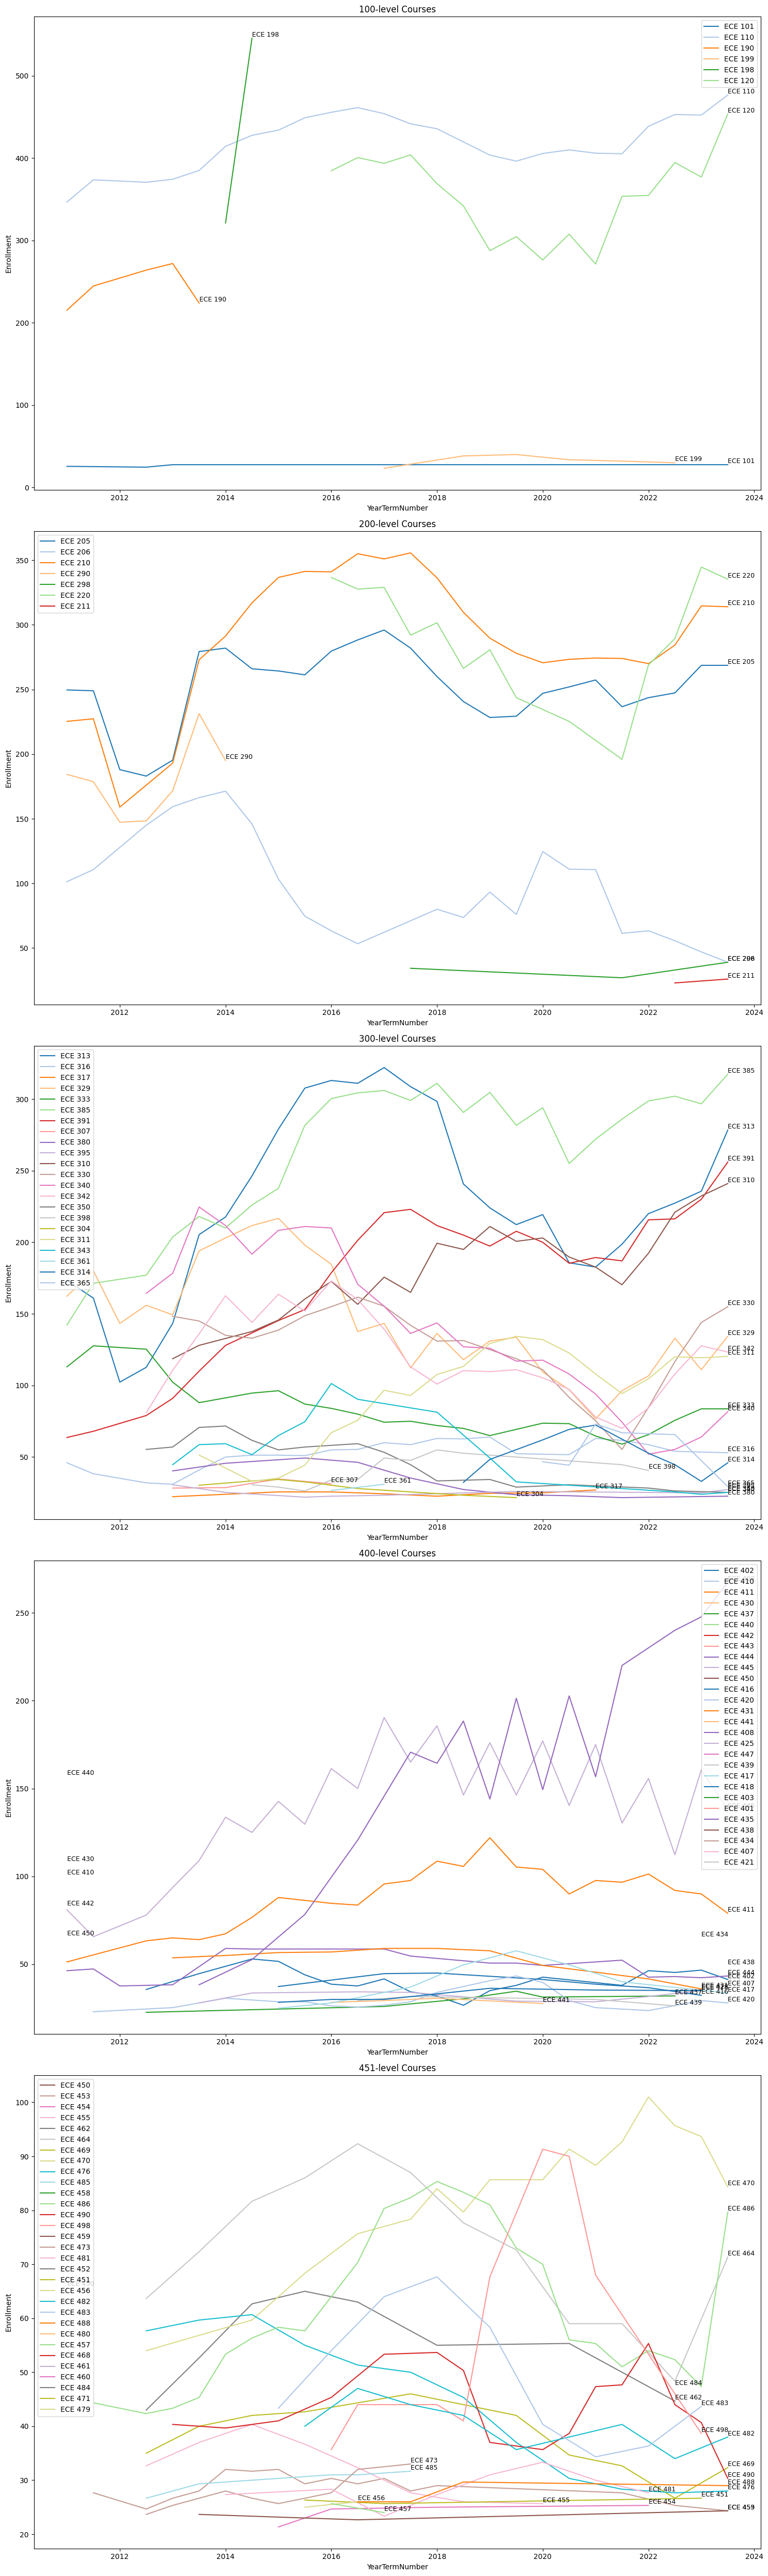

In [43]:
# Plot a line for each 'Partial Course'.
# The x axis should be YearTermNumber, and the y axis should be enrollment

import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(15, 50))
colors = plt.cm.tab20(np.linspace(0, 1, 20))
print(len(colors))
for level in [100, 200, 300, 400, 451]:
    plt.subplot(5, 1, round(level / 100))  # Creates subplot for each level
    for j, course in enumerate(df[df['Number'].astype(str).str.startswith(str(level // 100))]['Partial Course'].unique()):
        # Exclude CS 421
        if level == 400 and course == 'CS 421':
            continue
        # Exclude CS 498
        if level == 451 and course == 'CS 498':
            continue
        if level == 451 and int(course.split(' ')[1]) < 450:
            continue
        if level == 400 and int(course.split(' ')[1]) > 450:
            continue

        subset = df[(df['Partial Course'] == course)].sort_values('YearTermNumber')
        subset['RollingAvg'] = subset['Enrollment'].rolling(window=3).mean()
        end_x = subset['YearTermNumber'].iloc[-1]
        end_y = subset['RollingAvg'].iloc[-1]
        plt.text(end_x, end_y, course, fontsize=9, verticalalignment='bottom')
        plt.plot(subset['YearTermNumber'], subset['RollingAvg'], label=course, color=colors[j % len(colors)])
    plt.title(f"{level}-level Courses")
    plt.xlabel('YearTermNumber')

    plt.ylabel('Enrollment')
    plt.legend()

plt.tight_layout()
plt.show()



In [53]:
# use pandas to load 'uiuc-gpa-dataset.csv'

import pandas as pd
df = pd.read_csv('uiuc-gpa-dataset.csv')
mapping = {
    'A+': 4.0,
    'A': 4.0,
    'A-': 3.67,
    'B+': 3.33,
    'B': 3.0,
    'B-': 2.67,
    'C+': 2.33,
    'C': 2.0,
    'C-': 1.67,
    'D+': 1.33,
    'D': 1.0,
    'D-': 0.67,
    'F': 0.0,
}
# Keep only Subject=='CS'
df = df[df['Subject'] == 'CS']

# Keep only Term=='Fall' or Term=='Spring'
df = df[(df['Term'] == 'Fall') | (df['Term'] == 'Spring')]

# Sum these columns 'A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F' into a 'Enrollment' column

df['Enrollment'] = df['A+'] + df['A'] + df['A-'] + df['B+'] + df['B'] + df['B-'] + df['C+'] + df['C'] + df['C-'] + df['D+'] + df['D'] + df['D-'] + df['F']

# Drop those columns


# Create a column 'Full Course' by string concating 'YearTerm' + Subject + Number, e.g. '2024-wi-ADV-150'

df['Full Course'] = df['YearTerm'] + '-' + df['Subject'] + '-' + df['Number'].astype(str)
df['Partial Course'] = df['Subject'] + ' ' + df['Number'].astype(str)
# Create a new column 'YearTermNumber' mapping Year+'Fall' to Year+0.5 and Year+'Spring' to Year
df['YearTermNumber'] = df['Year'].astype(int) + df['Term'].map({'Fall': 0.5, 'Spring': 0})

# Create a new dataframe that sums all rows 'Enrollment' values with the same 'Full Course' value, and includes 'Full Course','YearTermNumber',and 'Enrollment'ArithmeticError
df = df.groupby(['Partial Course', 'Number']).agg({
        'A+': 'sum',
        'A': 'sum',
        'A-': 'sum',
        'B+': 'sum',
        'B': 'sum',
        'B-': 'sum',
        'C+': 'sum',
        'C': 'sum',
        'C-': 'sum',
        'D+': 'sum',
        'D': 'sum',
        'D-': 'sum',
        'F': 'sum',
        'Enrollment': 'sum'
}).reset_index()
df['GPA'] = df.apply(lambda row: sum([mapping[grade] * row[grade] for grade in mapping]) / sum([row[grade] for grade in mapping]), axis=1)



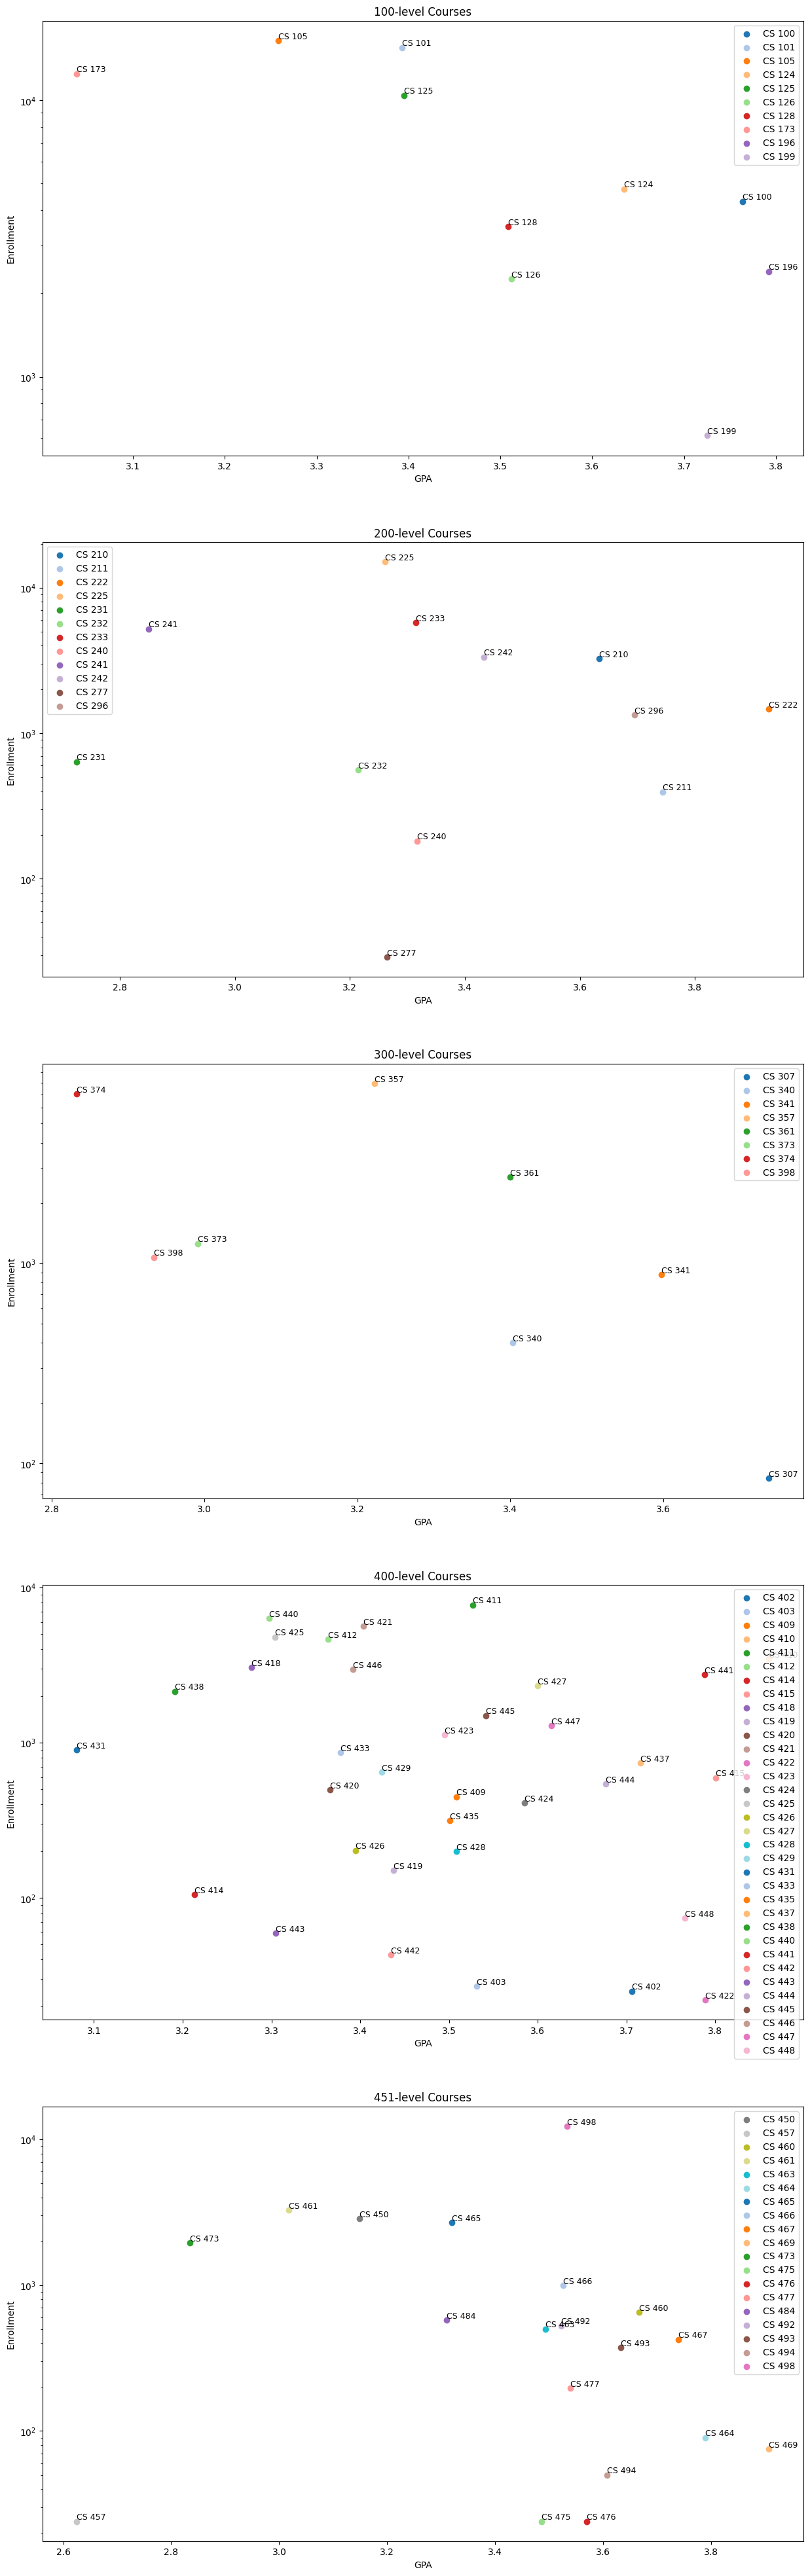

In [54]:

# For each level, show a dot plot with GPA on one axis, and 'Enrollment' on the other axis

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 50))
colors = plt.cm.tab20(np.linspace(0, 1, 20))

for level in [100, 200, 300, 400, 451]:
    plt.subplot(5, 1, round(level / 100))  # Creates subplot for each level
    for j, course in enumerate(df[df['Number'].astype(str).str.startswith(str(level // 100))]['Partial Course'].unique()):
        # Add dot
        if level>=400 and ((level == 400) != (int(course.split(' ')[1]) < 450)):
            continue

        subset = df[(df['Partial Course'] == course)]
        plt.scatter(subset['GPA'], subset['Enrollment'], label=course, color=colors[j % len(colors)])
        # Add label
        end_x = subset['GPA'].iloc[-1]
        end_y = subset['Enrollment'].iloc[-1]
        plt.text(end_x, end_y, course, fontsize=9, verticalalignment='bottom')
    plt.title(f"{level}-level Courses")
    plt.xlabel('GPA')
    plt.yscale('log')
    plt.ylabel('Enrollment')
    plt.legend()

In [65]:
df = pd.read_csv('uiuc-gpa-dataset.csv')

# Keep only Subject=='CS'
df = df[df['Subject'] == 'CS']

# Keep only Year>=2022
df = df[df['Year'] >= 2022]
# Return all instructor names
with open('cs-instructors.txt', 'w') as f:
    stuff = df['Primary Instructor'].unique()
    f.write('\n'.join([str(x) for x in df['Primary Instructor'].unique()]))
